# Random Forest Models

In this notebook we build upon what we learned about decision trees with random forests.

## What You'll Accomplish

<ul>
    <li>We'll talk about the wisdom of the crowd approach,</li>
    <li>Demonstrate Random Forests with Crescent Moons Data,</li>
    <li>See how random forests work by collecting many trees,</li>
    <li>You'll make a random forest model to return to the heart disease data,</li>
    <li>Finally you'll see how random forests can be usefull for feature extraction.</li>
</ul>


In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

## Wisdom of the Crowd

Just like an actual forest is comprised of numerous trees, a random forest is comprised of numerous decision trees. The idea behind the algorithm is our first example of <i>ensemble learning</i> which is a machine learning implementation of the <i>wisdom of the crowd</i>. 

If you're unfamiliar with the wisdom of the crowd think of it as follows. Suppose you want to know the answer to some question. Instead of basing the answer on a single person's response, you survey thousands or millions of people. To get your answer you aggregate all of the individual answers you've collected. In many cases this aggregated answer will be more correct than a single expert's answer.

So the idea with ensemble methods is to build a number of different algorithms then average their predictions into a "wiser" prediction. In the case of random forests this means building many decision trees that are different (usually by some random perturbation) that are then used to produce a forest.

We'll talk more generally about ensemble learning in a later notebook. For this notebook we restrict ourselves to random forests.

## Seeing the Forest For the Trees

Now let's restrict ourselves to random forests. We will start by playing around with some synthetic data first, then you will return to the heart disease data set and compare the random forest approach to the decision tree you built in the last notebook.

First the data. We'll play around with what's known as the cresent moons data, which is a popular benchmark data set for classification algorithms. `sklearn` provides an easy function to generate the data set. We'll first plot the data without any random noise. This will allow you to see what the true relationship is.

In [2]:
# Import the function that makes the data set
from sklearn.datasets import make_moons

In [3]:
# Get the features and target data
# We'll assume that this is the training data for simplicity
# Because the data is randomly generated we can always make more
X,y = make_moons(n_samples=1000, shuffle=True, noise=0, random_state=614)


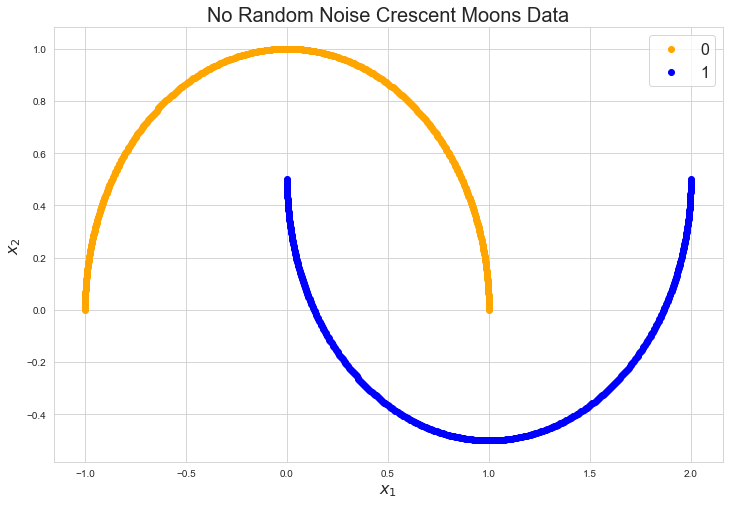

In [4]:
# Plot the data with labels
plt.figure(figsize = (12,8))
           
plt.scatter(X[y == 0,0],X[y == 0,1],color="orange",label="0")
plt.scatter(X[y == 1,0],X[y == 1,1],color="blue",label="1")

plt.legend(fontsize=16)

plt.xlabel("$x_1$",fontsize=16)
plt.ylabel("$x_2$",fontsize=16)
plt.title("No Random Noise Crescent Moons Data",fontsize = 20)

plt.show()

Now we'll plot the data set with some added noise, like how we get real data. We'll plot it, then you'll fit a single decision tree to the data. Then we'll build a random forest and compare the two.

In [5]:
# Get the features and target data
# We'll assume that this is the training data for simplicity
# Because the data is randomly generated we can always make more
X,y = make_moons(n_samples=1000, shuffle=True, noise=.2, random_state=614)


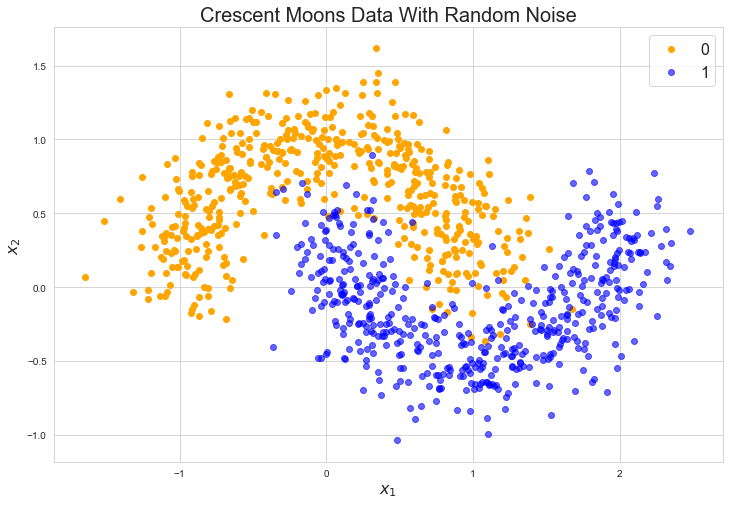

In [6]:
# Plot the data with labels
plt.figure(figsize = (12,8))
           
plt.scatter(X[y == 0,0],X[y == 0,1],color="orange",label="0")
plt.scatter(X[y == 1,0],X[y == 1,1],color="blue",label="1", alpha = .6)

plt.legend(fontsize=16)

plt.xlabel("$x_1$",fontsize=16)
plt.ylabel("$x_2$",fontsize=16)
plt.title("Crescent Moons Data With Random Noise",fontsize = 20)

plt.show()

In [7]:
# Build a Decision Tree on this data
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [8]:
# Use a max depth of 4 as a start
# Use 614 as a random state
# Call the classifier tree_clf
max_depth = 4
tree_clf = DecisionTreeClassifier(max_depth = max_depth,random_state = 614)

# Fit the tree
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=614, splitter='best')

Tto help visualize the decision tree further we're going to add the decision boundary to the plot from above. In the following code block is a function that will plot the decision boundary for you, set `pts=True` when you call the function if you'd like to see the data on the plot as well. 

In [9]:
# Run this code to define the function
# That will plot the decision boundary
def plot_bound(clf,X,y,pts = False):
    plot_step = 0.02

    x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
    y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                            np.arange(y_min, y_max, plot_step))


    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize = (12,10))
    cs = plt.contourf(xx, yy, Z, colors=['orange','white','blue','white'])

    if pts:
        plt.scatter(X[y == 0,0],X[y == 0,1],color="black",ec="white",label="0",s=50)
        plt.scatter(X[y == 1,0],X[y == 1,1],color="white",label="1", alpha = 1,s=50)

        plt.legend(fontsize=16)

    plt.xlabel("$x_1$",fontsize=16)
    plt.ylabel("$x_2$",fontsize=16)
    plt.title("Crescent Moons Data With Random Noise",fontsize = 20)

    plt.show()

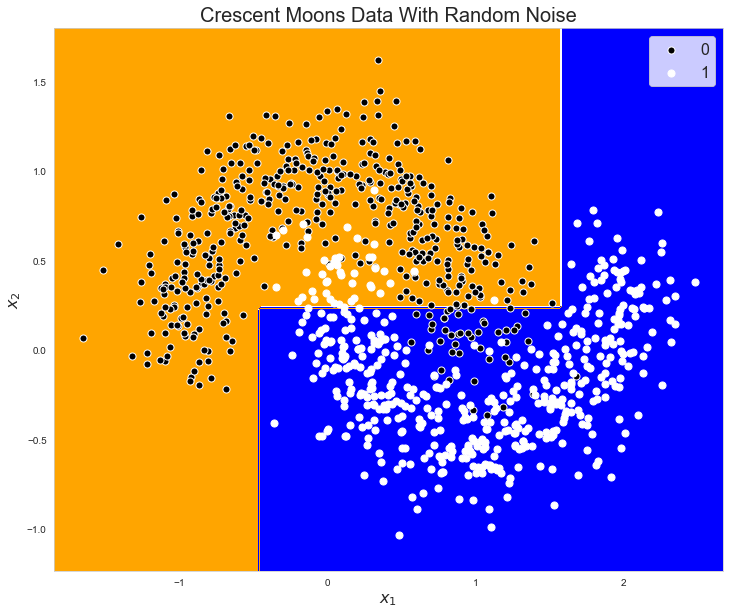

In [11]:
# Plot the boundary
plot_bound(tree_clf,X,y, True)

Now let's see what a random forest fit on the same data produces. If you play around with the max_depth hyperparameter, make sure you do the same thing with the decision tree plot so you can make a direct comparison.

In [12]:
# This imports the random forest classifier
from sklearn.ensemble import RandomForestClassifier

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


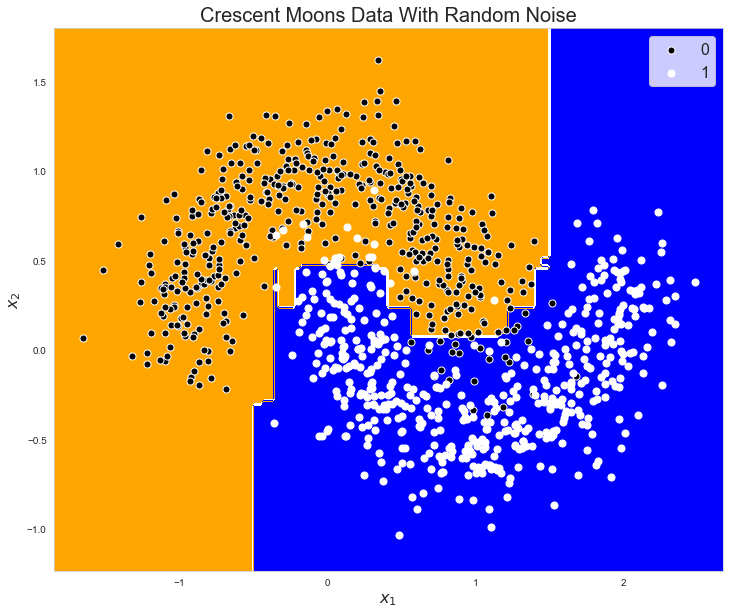

In [14]:
# we don't have a random state,
# what happens when we rerun the code block?
forest_clf = RandomForestClassifier(max_depth = max_depth)

forest_clf.fit(X,y)

plot_bound(forest_clf,X,y, True)

### Dear Diary 

Take a moment to write down your own observations on the differences between the random forest boundary and the decision tree boundary.










### What's Going On?

So what is `sklearn` doing when we train a random forest? <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html</a>

We already know that it is somehow building many decision trees and then averaging the results, but how does it build those trees?

There are a number of ways that can be done.

#### Sampling Subsets of the Training Data

##### Random Sampling With Replacement (Bagging)

One way is to randomly sample training points with replacement from the data set, then train the algorithm on the randomly sampled set. Note that this is the default for `sklearn`'s decision trees, it can be controlled with the hyperparameter `bootstrap` a value of True uses bagging, a value of False trains each tree with the entire data set. 

So if your training set has $n$ points, the algorithm randomly samples $n$ points with replacement (note this is the default it can be changed to be less than the entire dataset using `max_samples`) then trains a decision tree on it. 

Random Forests train `n_estimators` (an input to the `sklearn` method) independent trees. The default is $100$ trees, but this can be changed.

This process is more generally known as <i>bagging</i>, which we'll return to in the more general ensemble learning notebook. 

##### Random Sampling Without Replacement (Pasting)

An alternative to bagging is to randomly select data points without replacement from the training set. This is known as <i>pasting</i>. 

We won't spend time on this one here since the random forests in `sklearn` don't currently support this option. We'll revisit it in the ensemble learning notebook.

#### Randomly Selecting Predictors

In addition to the ability to randomly sample data, every decision tree is built on a random sample of the features of the data. This means that unlike in a single decision tree where the best cut is chosen from all of the features at each step, we limit ourselves to which features we consider. 

Also just like in decision trees you can control the maxinum number of features considered in your model with the hyperparameter `max_features`.


## A Note on Hyperparameters

Compared to all of the algorithms we've examined this far random forests have the most hyperparameters to think about. Depending on the settings you choose for the algorithm, you could wind up with vastly different predictions. It's always important to put thought into why you choose a particular hyperparameter value.

## Classifying Heart Disease with Random Forests

Now we return to our heart disease data set from the decision tree notebook. 

Our goal is to see if we can build a random forest model that outperforms our single decision tree. For time purposes we'll limit ourselves to the model built with data that included categorical variables.

Ready. Set. Go.

In [17]:
## PRACTICE
# Prepare the Data Here, 
# Make sure to get a train and test set,
# And one hot encode the categorical variables

# Import the data
# it is stored in the cleveland_heart csv
heart = pd.read_csv("cleveland_heart.csv")

# our target is whether or not there was heart disease
heart['target'] = 0
heart.loc[heart.status > 0,'target'] = 1

In [20]:
for var in ['sex','cp','fbs','restecg','exang','slope','ca','thal']: 
    heart = pd.concat([heart,pd.get_dummies(heart[var], prefix=var)], axis=1)


In [23]:
# Use this block if needed
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(heart.drop(columns = ['status','target']),
                                                heart[['target']], 
                                                shuffle = True,
                                                stratify = heart[['target']], 
                                                random_state = 614)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [24]:
## Put More Code Here
# Making function to calculate various stats
## Accuracy
def get_acc(prediction,y):
    return np.round(np.sum(prediction == y)/len(y),5)*100
## Precision
def get_prec(prediction,y):
    positives = prediction[prediction == 1]
    return np.round(np.sum(positives == y[prediction == 1])/len(positives),5)*100
## Recall
def get_recall(prediction,y):
    ones = y[y==1]
    return np.round(np.sum(prediction[y==1] == ones)/len(ones),5)*100

In [25]:
## Put more code here 
# CV
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [33]:
param = {'max_depth': range(1,7)}
rf_model = RandomForestClassifier()
clf = GridSearchCV(rf_model, param, cv=5, scoring='recall')
clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [34]:
# We'll plot the mean measure across the folds as 
# a function of max_depth

clf.cv_results_

{'mean_fit_time': array([0.01913862, 0.0144598 , 0.01807771, 0.01516819, 0.01813812,
        0.01691093]),
 'std_fit_time': array([0.00187124, 0.00074241, 0.00154702, 0.00042937, 0.00242383,
        0.00139525]),
 'mean_score_time': array([0.00337958, 0.00302405, 0.00340958, 0.00270076, 0.0031456 ,
        0.00289702]),
 'std_score_time': array([0.00056476, 0.00063265, 0.00088574, 0.00023665, 0.00054759,
        0.00045364]),
 'param_max_depth': masked_array(data=[1, 2, 3, 4, 5, 6],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1},
  {'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6}],
 'split0_test_score': array([0.9047619 , 0.85714286, 0.9047619 , 0.80952381, 0.80952381,
        0.85714286]),
 'split1_test_score': array([0.57142857, 0.71428571, 0.76190476, 0.66666667, 0.71428571,
        0.71428571]),
 'split2_test_score': array([0.6 , 0.45, 0.5

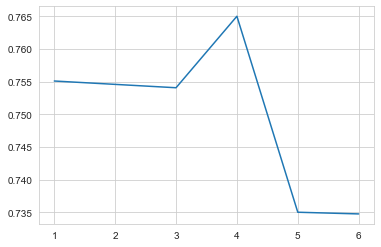

In [35]:
plt.plot(range(1,7), clf.cv_results_['mean_test_score'])

In [ ]:
# Compare to Decision Tree
# make an empty array that will hold all of our accuracy measures
accs_tree = np.empty([max_depth,n_splits])
prec_tree = np.empty([max_depth,n_splits])
rec_tree = np.empty([max_depth,n_splits])












        

In [ ]:
# Choose a measure and plot it against the maximum depth
# for the decision tree and the random forest












## Using Random Forests for Feature Extraction

An additional benefit of the random forest algorithm is its ability to identify which features are importnat when determining the class. 

The `sklearn` algorithm measures importance in the following way. For each feature it looks at every tree and identifies the nodes using that feature to make a cut. It then measures how much those cuts reduced impurity and averages that value over all the trees in the forest. After getting the average impurity reduction for each feature, `sklearn` scales the results so that the sum of all feature importances is equal to $1$.

Using your results from above select a single random forest model for the heart data. We can then use that model to examine feature importance below.

In [36]:
## Choose your model here
## Call the model tree_clf and then fit it using X_train_prime and y_train
forest_clf = RandomForestClassifier(n_estimators=500,max_depth = 6)
forest_clf.fit(X_train_prime,y_train.values.ravel())

NameError: name 'X_train_prime' is not defined

In [ ]:
## Feature Importance
# This snippet of code makes a feature importance dataframe
# then it displays it in order of decreasing importance
names = []
scores = []
for name, score in zip(X_train_prime.columns,forest_clf.feature_importances_):
    names.append(name)
    scores.append(np.round(score,4))
    
score_df = pd.DataFrame({'feature':names,'importance_score':scores})

score_df.sort_values('importance_score',ascending=False)





This is a nice feature of random forests, it allows us to understand what variables are most important, which can help us explain the algorithm. It is also useful if you need to perform feature selection.

## Extra-Trees

If you were sitting there thinking that you'd like to make this process even more random, you're in luck.

An extension of random forests is know as extra-trees. This algorithm is just like a random forest, but in addition to randomly selecting a handful of features to optimize it also randomly selects the cutpoints instead of having the tree search for the optimal one.

This algorithm is faster random forests, but does tend to have a little more bias. Typically you'll have to build both classifiers and compare measures via cross-validation to decide if an extra-trees classifier is better than a standard random forest.

This algorithm can be enacted using `ExtraTreesClassifier` from `sklearn`.

## Random Forest Probability

Remember that another measure of algorithm "goodness" is the AUC score, but to calculate it you need some kind of score that can be thresholded to determine the classification. For the random forest classifier in sklearn you can get class probabilities like so.

In [37]:
# The first column is probability of being class 0
# the second is probability of being class 1
forest_clf.predict_proba(X_train_prime)

NameError: name 'X_train_prime' is not defined